In [26]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../bin/imports.ipynb")
execute_notebook("../../bin/plotting.ipynb")

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Thresholding the inclusion of mutations based on their allelic fraction in patients <br>
The current threshold is removing those below the 25 percentile cutoff

Pan analysis

In [27]:
classes = ['class_ii']
all_dfs = []
for c in classes:
    for f, name in zip(['cancer.thresh_2.txt', 'known_non_cancer.thresh_2.txt'],
                       ['Driver Mutations', 'Established non-cancer']): 
        tmp = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR_clean/pan/{0}/{1}'.format(c, f),
               sep=' ')
        tmp['Class'] = c
        tmp['Condition'] = name
        all_dfs.append(tmp)
pan = pd.concat(all_dfs)

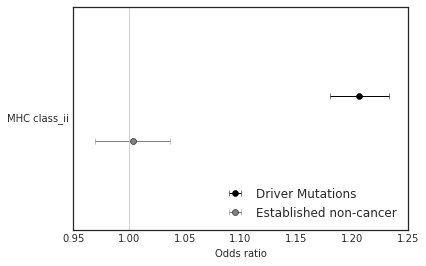

In [29]:
plot = plot_pan_comparison_single(pan, 'Condition', 
                           '/cellar/users/ramarty/Data/hla_ii/generated_figures/mutations/established_non_cancer.pan_OR.pdf')

In [35]:
classes = ['class_ii']
all_dfs = []
for c in classes:
    for f, name in zip(['cancer.thresh_2.txt', 'non_cancer.thresh_2.txt'],
                       ['Driver Mutations', 'Random non-cancer']): 
        tmp = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR_clean/pan/{0}/{1}'.format(c, f),
               sep=' ')
        tmp['Class'] = c
        tmp['Condition'] = name
        all_dfs.append(tmp)
pan = pd.concat(all_dfs)

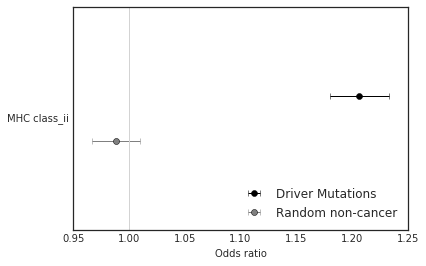

In [36]:
plot = plot_pan_comparison_single(pan, 'Condition', 
                           '/cellar/users/ramarty/Data/hla_ii/generated_figures/mutations/random_non_cancer.pan_OR.pdf')

Tissue analysis

In [37]:
df1 = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR_clean/tissue/class_ii/cancer.thresh_2.txt',
           sep=',')
df2 = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR_clean/tissue/class_ii/known_non_cancer.thresh_2.txt',
           sep=',')

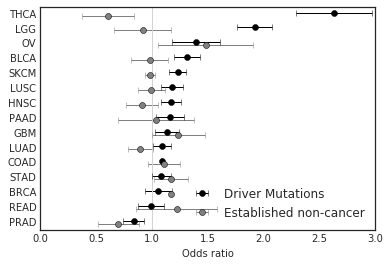

In [38]:
ax = plot_tissue_comparison(df1, df2, 'Driver Mutations', 'Established non-cancer',
                            '/cellar/users/ramarty/Data/hla_ii/generated_figures/mutations/established_non_cancer.classII_OR.pdf')

In [40]:
df1 = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR_clean/tissue/class_ii/cancer.thresh_2.txt',
           sep=',')
df2 = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR_clean/tissue/class_ii/non_cancer.thresh_2.txt',
           sep=',')

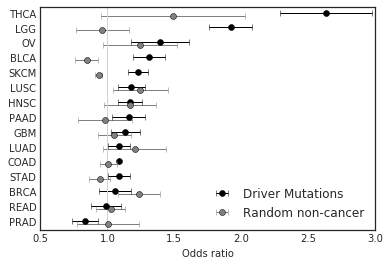

In [41]:
ax = plot_tissue_comparison(df1, df2, 'Driver Mutations', 'Random non-cancer',
                            '/cellar/users/ramarty/Data/hla_ii/generated_figures/mutations/random_non_cancer.classII_OR.pdf')